# Assigment 3: k-layers

### Preprocessing

In [1]:
from data.classifier import Classifier
from data.load_data import *
from src.utils import *

In [2]:
data = load_data()
data = preprocessing(data)
data.keys()

dict_keys(['train_data', 'validation_data', 'test_data'])

## Exercise 1: Upgrade assigment 2 and test k-layer net-works


### Compute gradients of a 2-layer network

Build a 2-layer network that calculates gradients

In [3]:
layers = 2
input_nodes = len(data['train_data']['data'][:, :10])
hidden_nodes = 10
output_nodes = len(data['train_data']['one_hot'])

In [4]:
classifier = Classifier()
classifier.add_layer(n=hidden_nodes, input_nodes=input_nodes)
classifier.add_layer(n=output_nodes,input_nodes=hidden_nodes)

predictions = classifier.predict(data['train_data']['data'],complete=True)
assert len(predictions) == layers + 1 #this should be number of layers + 1
grad_w,grad_b = classifier.compute_gradients(data['train_data']['data'][:, :20],
                                               data['train_data']['one_hot'][:, :20],lambda_reg=0,eta=0.1)

Compute gradients numerically and check if the calculations were well done

In [5]:
classifier2 = Classifier()
classifier2.add_layer(n=hidden_nodes, input_nodes=input_nodes)
classifier2.add_layer(n=output_nodes,input_nodes=hidden_nodes)
grad_w_num,grad_b_num = classifier2.check_gradients_num(data['train_data']['data'][:, :20],
                                          data['train_data']['one_hot'][:, :20],
                                            1e-6)
for l in range(len(grad_w)):
    print(f'gradient_w{l+1} well calculated: ', check_matrices(grad_w[l], grad_w_num[l]))
    print(f'gradient_b{l+1} well calculated: ', check_matrices(grad_b[l], grad_b_num[l]))

100%|██████████| 2/2 [00:14<00:00,  7.06s/it]

gradient_w1 well calculated:  7.24967849641267e-10
gradient_b1 well calculated:  2.3651106767497154e-10
gradient_w2 well calculated:  4.1586999816045633e-10
gradient_b2 well calculated:  4.347077697808288e-10


### Compute gradients of a 3-layer network

Build a 3-layer network that calculates gradients

In [6]:
layers = 3
input_nodes = len(data['train_data']['data'][:, :10])
hidden_nodes1 = 10
hidden_nodes2 = 8
output_nodes = len(data['train_data']['one_hot'])

In [7]:
classifier = Classifier()
classifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier.add_layer(n=output_nodes,input_nodes=hidden_nodes2)

predictions = classifier.predict(data['train_data']['data'],complete=True)
assert len(predictions) == layers + 1 #this should be number of layers + 1
grad_w,grad_b  = classifier.compute_gradients(data['train_data']['data'][:, :20],
                                               data['train_data']['one_hot'][:, :20],lambda_reg=0,eta=0.1)

Compute gradients numerically

In [8]:
classifier2 = Classifier()
classifier2.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier2.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier2.add_layer(n=output_nodes,input_nodes=hidden_nodes2)

grad_w_num,grad_b_num = classifier2.check_gradients_num(data['train_data']['data'][:, :20],
                                          data['train_data']['one_hot'][:, :20],
                                            1e-6)
                                      
for l in range(len(grad_w)):
    print(f'gradient_w{l+1} well calculated: ', check_matrices(grad_w[l], grad_w_num[l]))
    print(f'gradient_b{l+1} well calculated: ', check_matrices(grad_b[l], grad_b_num[l]))

100%|██████████| 3/3 [00:14<00:00,  4.76s/it]

gradient_w1 well calculated:  7.308822991269892e-10
gradient_b1 well calculated:  2.822983895256481e-10
gradient_w2 well calculated:  4.1374514925252015e-10
gradient_b2 well calculated:  2.688928246730171e-10
gradient_w3 well calculated:  4.3143593558836457e-10
gradient_b3 well calculated:  4.954571614090852e-10


### Compute gradients of a 4-layer network

In [9]:
layers = 4
input_nodes = len(data['train_data']['data'][:, :10])
hidden_nodes1 = 10
hidden_nodes2 = 8
hidden_nodes3 = 11
output_nodes = len(data['train_data']['one_hot'])

In [10]:
classifier = Classifier()
classifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier.add_layer(n=hidden_nodes3, input_nodes=hidden_nodes2)
classifier.add_layer(n=output_nodes,input_nodes=hidden_nodes3)

predictions = classifier.predict(data['train_data']['data'],complete=True)
assert len(predictions) == layers + 1 #this should be number of layers + 1
parameters = classifier.compute_gradients(data['train_data']['data'][:, :20],
                                               data['train_data']['one_hot'][:, :20],lambda_reg=0,eta=0.1)

In [11]:
classifier2 = Classifier()
classifier2.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier2.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier2.add_layer(n=hidden_nodes3, input_nodes=hidden_nodes2)
classifier2.add_layer(n=output_nodes,input_nodes=hidden_nodes3)

W,b = classifier2.check_gradients_num(data['train_data']['data'][:, :20],
                                          data['train_data']['one_hot'][:, :20],
                                            1e-6)
                                      
for l in range(len(grad_w)):
    print(f'gradient_w{l+1} well calculated: ', check_matrices(grad_w[l], grad_w_num[l]))
    print(f'gradient_b{l+1} well calculated: ', check_matrices(grad_b[l], grad_b_num[l]))

100%|██████████| 4/4 [00:14<00:00,  3.72s/it]

gradient_w1 well calculated:  7.308822991269892e-10
gradient_b1 well calculated:  2.822983895256481e-10
gradient_w2 well calculated:  4.1374514925252015e-10
gradient_b2 well calculated:  2.688928246730171e-10
gradient_w3 well calculated:  4.3143593558836457e-10
gradient_b3 well calculated:  4.954571614090852e-10


## Exercise 2: Can I train multi-layer networks?

### Training a 2-layer network

In [12]:
data = load_no_validation()
data = preprocessing(data)

In [13]:
layers = 2
input_nodes = len(data['train_data']['data'])
hidden_nodes = 50
output_nodes = len(data['train_data']['one_hot'])

n_batch = 90
cycles = 3
n_s = 1000
n = len(data['train_data']['data'][0])
epochs = int(cycles*n_s*2/(n/n_batch))

In [14]:
data['train_data']['data'].shape

(3072, 49000)

100%|██████████| 11/11 [00:31<00:00,  2.82s/it]


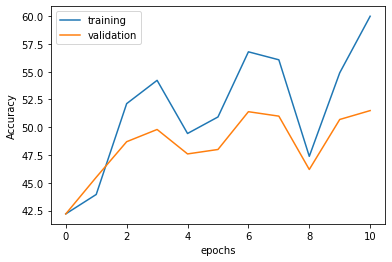

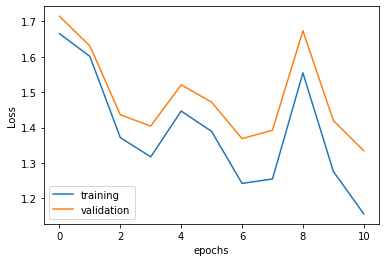

Test accuracy: 51.73


In [15]:
classifier = Classifier()
classifier.add_layer(n=hidden_nodes, input_nodes=input_nodes)
classifier.add_layer(n=output_nodes,input_nodes=hidden_nodes)
metrics = classifier.fit(data['train_data']['data'], data['train_data']['one_hot'],
                         data['validation_data']['data'], data['validation_data']['one_hot'],
                         data['train_data']['labels'],
                         data['validation_data']['labels'],
                         'cross-entropy',
                         n_batch=n_batch, eta=1e-5, n_epochs=epochs, lamda=0.0009, eta_min=1e-5, eta_max=1e-1, n_s=n_s)

error_plot_normal(metrics['accuracy_train'], metrics['accuracy_val'], "Accuracy")
error_plot_normal(metrics['loss_train'], metrics['loss_val'], "Loss")
prediction_test = classifier.predict(data['test_data']['data'])
test_accuracy = classifier.compute_accuracy(data['test_data']['labels'],prediction_test)
print("Test accuracy:" ,test_accuracy)


### Training a 3-layer network

Added: Xavier initialization +Random shuffling 

In [20]:
layers = 3
input_nodes = len(data['train_data']['data'])
hidden_nodes1 = 50
hidden_nodes2 = 50
output_nodes = len(data['train_data']['one_hot'])

n_batch = 100
cycles = 2
n_s = 5*49000/n_batch
n = len(data['train_data']['data'][0])
epochs = int(cycles*n_s*2/(n/n_batch))
lamda = 0.005

100%|██████████| 20/20 [00:57<00:00,  2.90s/it]


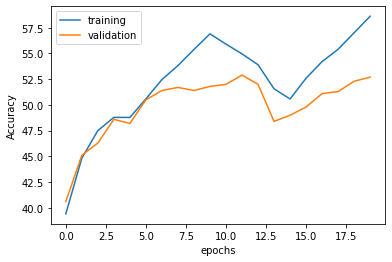

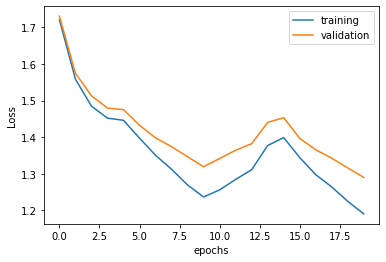

Test accuracy: 52.93


In [21]:
classifier = Classifier()
classifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier.add_layer(n=output_nodes,input_nodes=hidden_nodes2)
metrics = classifier.fit(data['train_data']['data'], data['train_data']['one_hot'],
                         data['validation_data']['data'], data['validation_data']['one_hot'],
                         data['train_data']['labels'],
                         data['validation_data']['labels'],
                         'cross-entropy',
                         n_batch=n_batch, eta=1e-5, n_epochs=epochs, lamda=lamda, eta_min=1e-5, eta_max=1e-1, n_s=n_s)
error_plot_normal(metrics['accuracy_train'], metrics['accuracy_val'], "Accuracy")
error_plot_normal(metrics['loss_train'], metrics['loss_val'], "Loss")
prediction_test = classifier.predict(data['test_data']['data'])
test_accuracy = classifier.compute_accuracy(data['test_data']['labels'],prediction_test)
print("Test accuracy:" ,test_accuracy)

### Training a 9-layer network

In [22]:
layers = 3
input_nodes = len(data['train_data']['data'])
output_nodes = len(data['train_data']['one_hot'])
nodes = [input_nodes, 50, 30, 20, 20, 10, 10, 10, 10, output_nodes]
n_batch = 100
cycles = 2
n_s = 5*49000/n_batch
n = len(data['train_data']['data'][0])
epochs = int(cycles*n_s*2/(n/n_batch))
lamda = 0.005

100%|██████████| 20/20 [00:59<00:00,  2.99s/it]


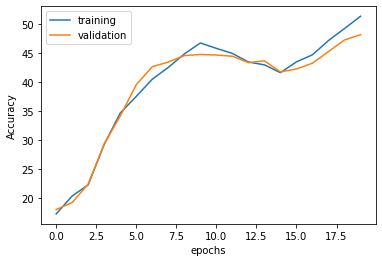

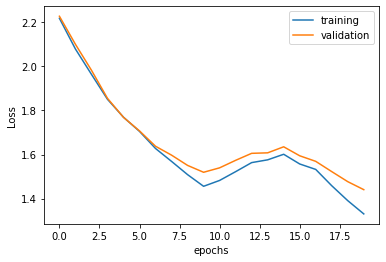

Test accuracy: 46.239999999999995


In [23]:
classifier = Classifier()
for i in range(len(nodes)-1):
    classifier.add_layer(n=nodes[i+1], input_nodes=nodes[i])

metrics = classifier.fit(data['train_data']['data'], data['train_data']['one_hot'],
                         data['validation_data']['data'], data['validation_data']['one_hot'],
                         data['train_data']['labels'],
                         data['validation_data']['labels'],
                         'cross-entropy',
                         n_batch=n_batch, eta=1e-5, n_epochs=epochs, lamda=lamda, eta_min=1e-5, eta_max=1e-1, n_s=n_s)
error_plot_normal(metrics['accuracy_train'], metrics['accuracy_val'], "Accuracy")
error_plot_normal(metrics['loss_train'], metrics['loss_val'], "Loss")
prediction_test = classifier.predict(data['test_data']['data'])
test_accuracy = classifier.compute_accuracy(data['test_data']['labels'],prediction_test)
print("Test accuracy:" ,test_accuracy)